# Laboratorio 1 - Preparación y Visualización de Datos

## Grupo 1 - José Ignacio Navas Sanz, Belén Ortega Pérez y Paula Hípola Gómez

## Entregable 1 - Limpieza de datos

### 1.1- (1 punto) Descripción y limpieza de los datos.
#### Carga los datos en un DataFrame. Detecta y elimina los registros redundantes o con missing values. Recuerda que los missing values están marcados con el carácter ‘?’. ¿Cuántos registros has eliminado de cada tipo? ¿Qué campos tienen registros con ‘missing values’? Presenta un gráfico que muestre el número de missing values por atributo.


In [1]:
#Importamos las librerias necesarias
#Numpy
import numpy as np 
#Pandas
import pandas as pd

In [2]:
#Importamos el CSV de Hepatitis
hepatitis_data = pd.read_csv('hepatitis_data.csv')

#Mostramos los 5 primeros datos para ver que lee correctamente el CSV
hepatitis_data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [3]:
#El dataframe tiene valores nulos, se identifican con el caracter ?
#Imprimimos el numero de atributos y de columnas
print('La dimension del dataset es de',hepatitis_data.shape[0],'filas y',hepatitis_data.shape[1],'columnas')

La dimension del dataset es de 155 filas y 20 columnas


Podemos observar que la dimensión del dataframe consiste en 155 atributos con 20 propiedades cada uno. Ahora debemos proveder a eliminar los atributos que tengan propiedades nulas puesto que dificultan el estudio con precisión de los datos.

In [4]:
#Ahora casteamos la ? a NaN
hepatitis_data = hepatitis_data.replace('?',np.NaN)
#Contamos cuantos elementos tenemos nulos en cada columna
datosMissing = hepatitis_data.isna().sum()
print('Datos nulos de cada propiedad')
display(datosMissing)


Datos nulos de cada propiedad


class              0
age                0
sex                0
steroid            1
antivirals         0
fatigue            1
malaise            1
anorexia           1
liver_big         10
liver_firm        11
spleen_palable     5
spiders            5
ascites            5
varices            5
bilirubin          6
alk_phosphate     29
sgot               4
albumin           16
protime           67
histology          0
dtype: int64

Aqui podemos ver cuantos registros podemos eliminar de cada tipo. Si bien es cierto que no sabemos exactamente cuantos hay de cada puesto que en "protime" por ejemplo vemos que hay 67 pero puede ser que valores nulos que pertenezcan a esa columna haya solo 20

In [5]:
#Buscamos los duplicados
numDuplicados = hepatitis_data.duplicated().sum()
print('Hay', numDuplicados, 'elementos duplicados.')

Hay 0 elementos duplicados.


Tiene sentido que no haya datos duplicados puesto que se trata de resultados hechos a pacientes con hepatitis. Si existiera algún atributo duplicado probablemente se nos estaría colando información.

Ahora pasamos a eliminar los valores que eran nulos y comprobamos la nueva dimension del dataset.

In [6]:
#Ahora borramos esos NaN y contamos de nuevo las filas
hepatitis_data = hepatitis_data.dropna()
#Reseteamos el indice del dataframe
hepatitis_data = hepatitis_data.reset_index(drop=True)
#Tamaño de datos eliminados
print('La dimension del dataset sin datos nulos es de'
      ,hepatitis_data.shape[0],'filas y',hepatitis_data.shape[1],'columnas')
print('Datos nulos de cada propiedad')
datosMissing
#Contamos cuantos elementos tenemos nulos en cada columna
hepatitis_data.isnull().sum()

La dimension del dataset sin datos nulos es de 80 filas y 20 columnas
Datos nulos de cada propiedad


class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

Podemos comprobar como ahora no hay ninguna columna que tenga valores nulos por lo que ahora ya tenemos el dataset completo y podemos analizar sus datos de un modo más fiable.

### Pintando la gráfica

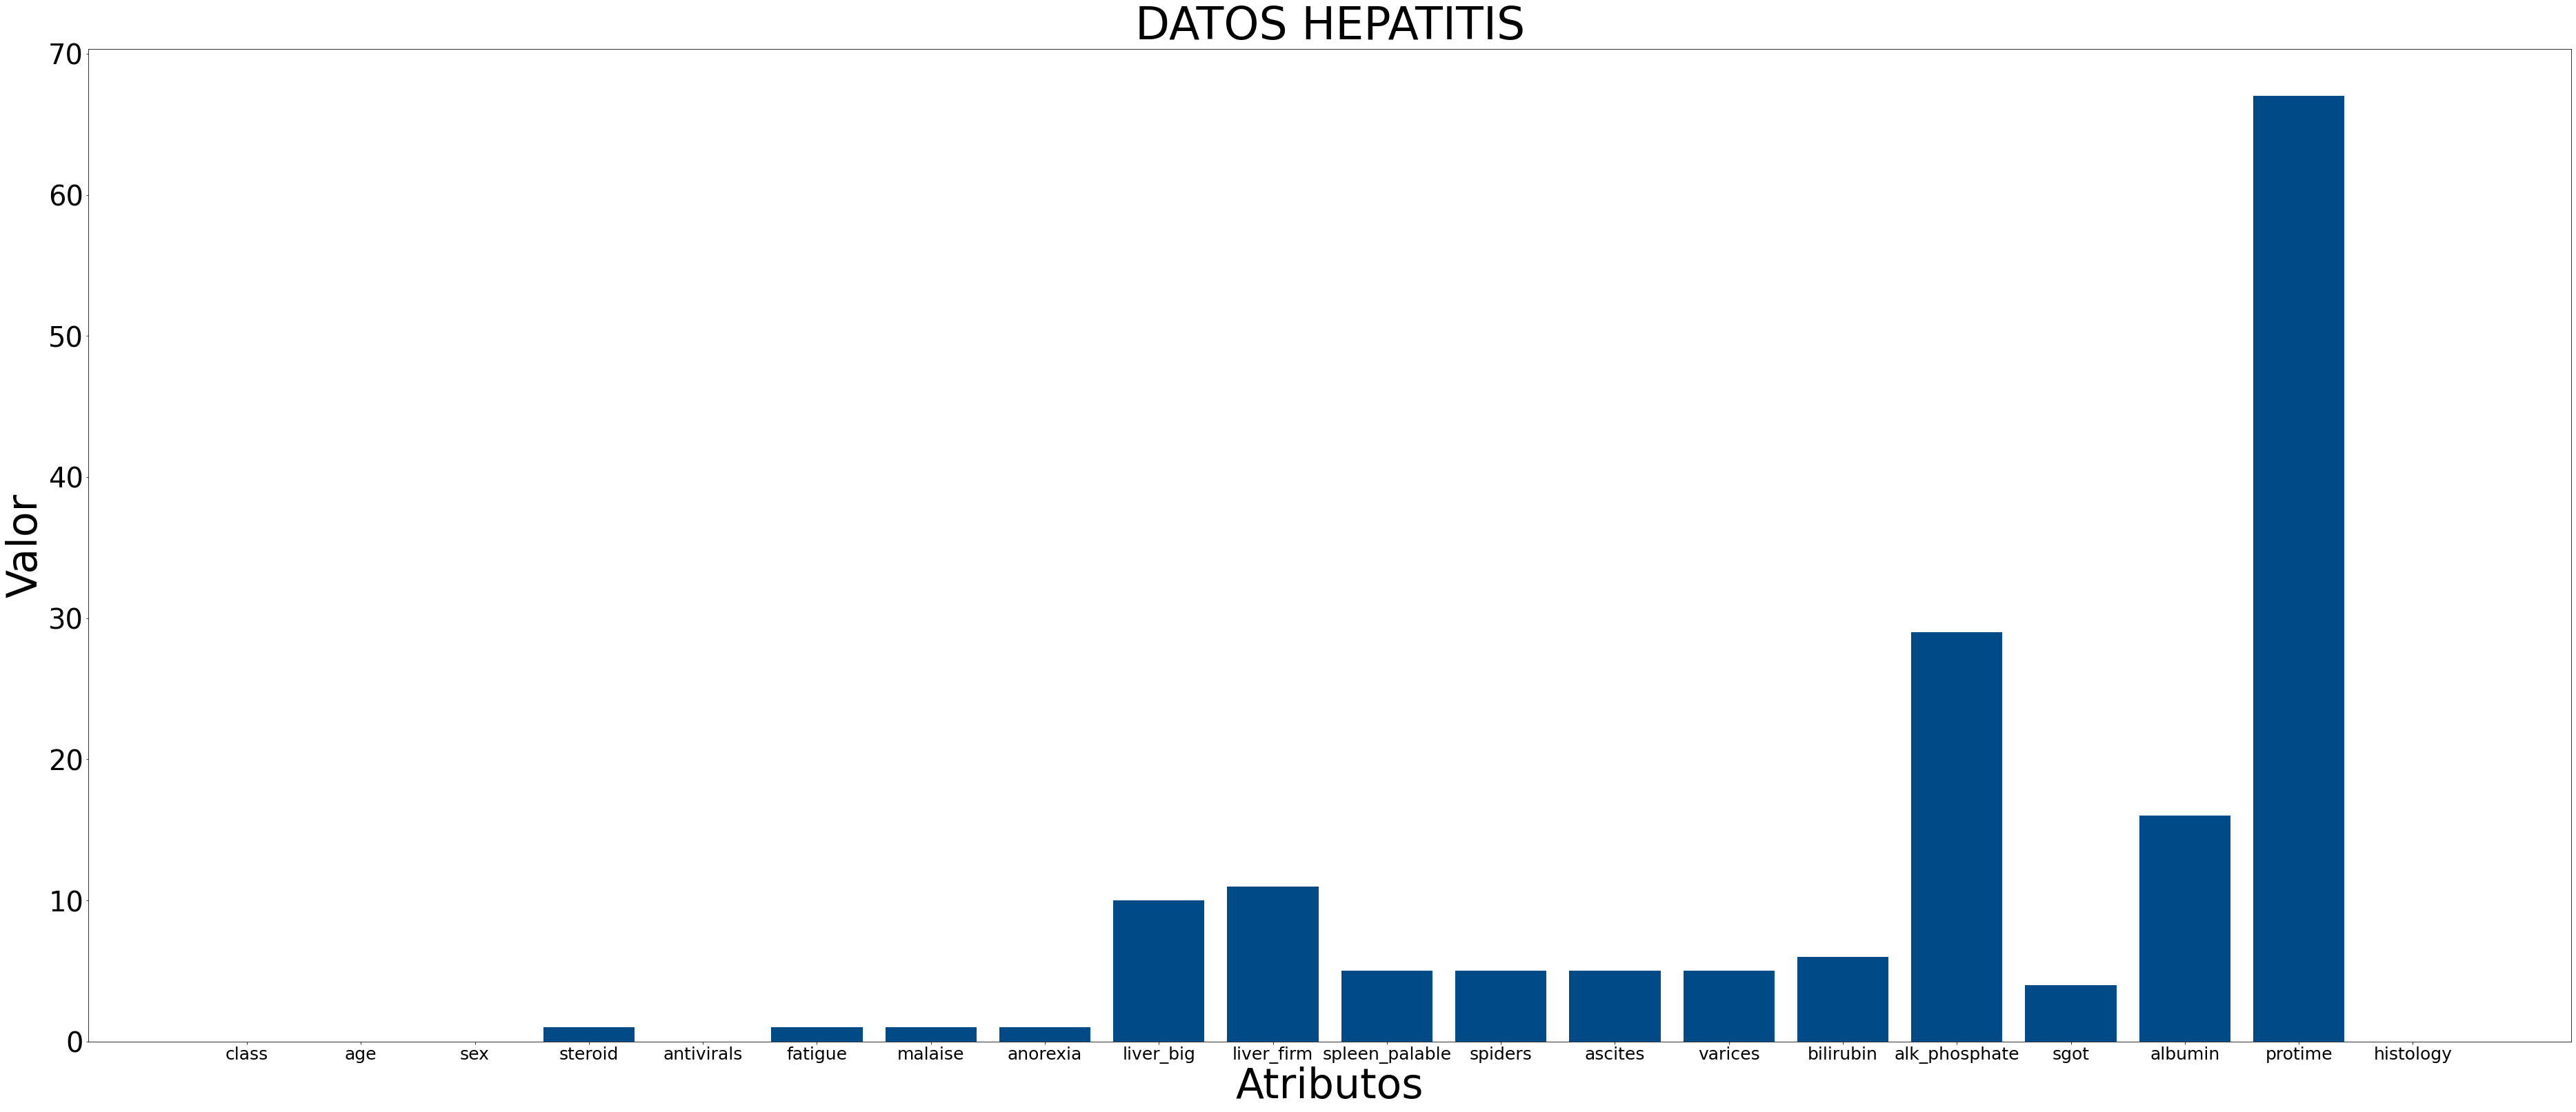

In [7]:
#Grafico
import matplotlib.pyplot as plt
figura = plt.figure(figsize=(50, 20))
ejes = figura.add_axes([0,0,1,1])
ejeX = datosMissing.index
ejeY = datosMissing.values
ejes.bar(ejeX,ejeY,color='#004B87')
plt.title('DATOS HEPATITIS', fontsize=65)
plt.xlabel('Atributos',fontsize=60)
plt.xticks(fontsize='25')
plt.ylabel('Valor',fontsize=60)
plt.yticks(fontsize='40')
plt.savefig('DatosHepatitis.png')
plt.show()

In [8]:
datosMissing.values

array([ 0,  0,  0,  1,  0,  1,  1,  1, 10, 11,  5,  5,  5,  5,  6, 29,  4,
       16, 67,  0], dtype=int64)

## 1.2-(0.5 puntos) Estudio preliminar de los datos.
### Cómo se distribuyen los pacientes que viven (class=2) de los que mueren (class=1) en el dataset. Presenta un gráfico de tarta que muestre esta distribución de la clase ‘class’ en los datos.

#### Analizando la clase del Dataset -- Gráfico Pie Chart

In [9]:
datos = hepatitis_data['class']
muertos = datos[datos == 1].count()
vivos = datos[datos == 2].count()

print('Hay',muertos,'atributos con la clase 1 - Mueren')
print('Hay',vivos,'atributos con la clase 2 - Viven')

Hay 13 atributos con la clase 1 - Mueren
Hay 67 atributos con la clase 2 - Viven


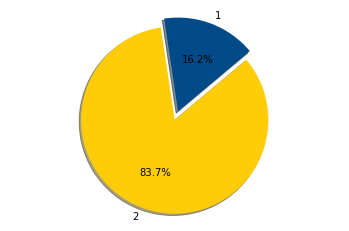

In [10]:
# Pie chart
labels = '1','2'
sizes = [muertos,vivos]
colors = ['#004B87', '#FFCD07']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0,0.1), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=40, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('PieChart_Hepatitis.png')
plt.show()

### Podemos determinar que viven más personas de las que mueren según los datos, en concreto un 83.7% sobreviven frente al 16.2% que lamentablemente mueren.